Plotting 22 mutations


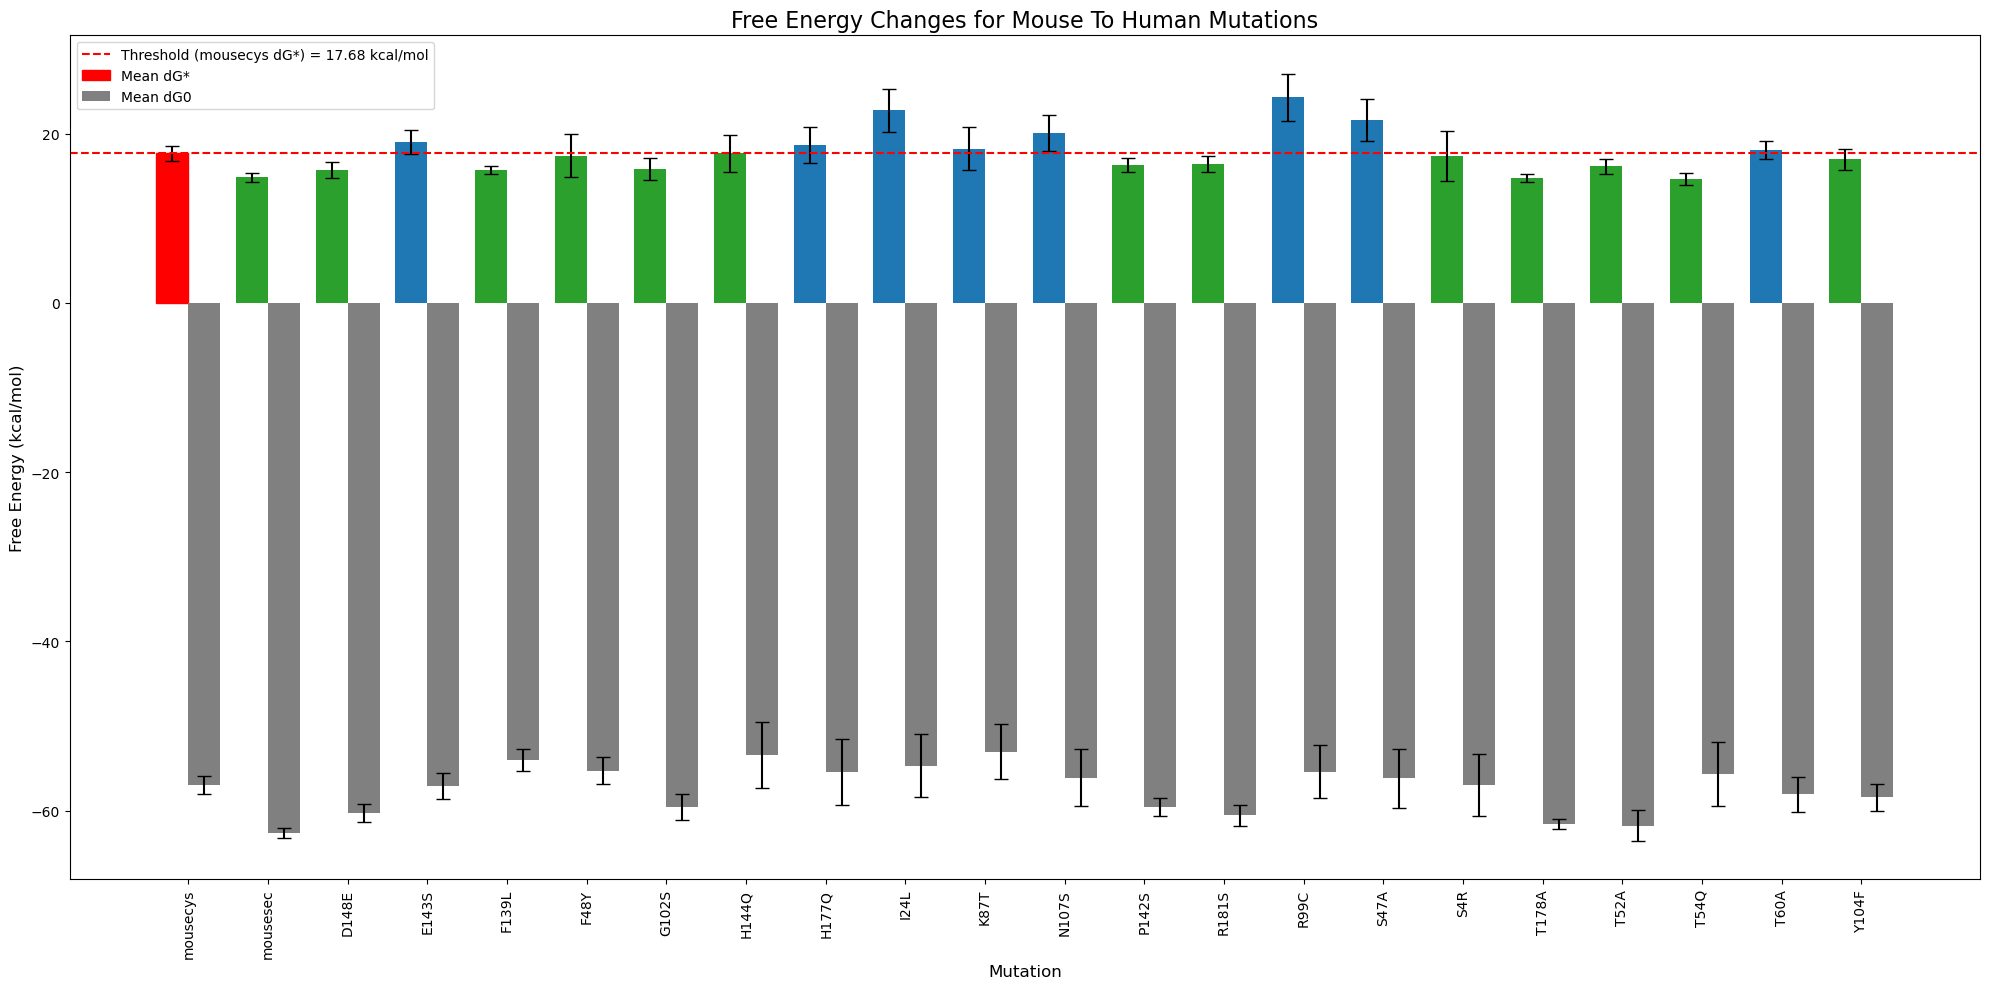

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Let's manually define all data to ensure we capture everything
data = [
    {"mutation": "mousecys", "dg_star": 17.68, "dg_star_error": 0.91, "dg0": -56.96, "dg0_error": 1.03},
    {"mutation": "mousesec", "dg_star": 14.84, "dg_star_error": 0.52, "dg0": -62.60, "dg0_error": 0.59},
    {"mutation": "D148E", "dg_star": 15.68, "dg_star_error": 0.94, "dg0": -60.30, "dg0_error": 1.09},
    {"mutation": "E143S", "dg_star": 19.04, "dg_star_error": 1.40, "dg0": -57.10, "dg0_error": 1.56},
    {"mutation": "F139L", "dg_star": 15.72, "dg_star_error": 0.48, "dg0": -54.00, "dg0_error": 1.27},
    {"mutation": "F48Y", "dg_star": 17.38, "dg_star_error": 2.54, "dg0": -55.26, "dg0_error": 1.54},
    {"mutation": "G102S", "dg_star": 15.83, "dg_star_error": 1.30, "dg0": -59.61, "dg0_error": 1.52},
    {"mutation": "H144Q", "dg_star": 17.66, "dg_star_error": 2.18, "dg0": -53.40, "dg0_error": 3.89},
    {"mutation": "H177Q", "dg_star": 18.66, "dg_star_error": 2.09, "dg0": -55.40, "dg0_error": 3.89},
    {"mutation": "I24L", "dg_star": 22.74, "dg_star_error": 2.54, "dg0": -54.69, "dg0_error": 3.73},
    {"mutation": "K87T", "dg_star": 18.21, "dg_star_error": 2.52, "dg0": -53.05, "dg0_error": 3.25},
    {"mutation": "N107S", "dg_star": 20.05, "dg_star_error": 2.12, "dg0": -56.09, "dg0_error": 3.33},
    {"mutation": "P142S", "dg_star": 16.30, "dg_star_error": 0.87, "dg0": -59.56, "dg0_error": 1.10},
    {"mutation": "R181S", "dg_star": 16.38, "dg_star_error": 0.97, "dg0": -60.55, "dg0_error": 1.26},
    {"mutation": "R99C", "dg_star": 24.29, "dg_star_error": 2.79, "dg0": -55.41, "dg0_error": 3.13},
    {"mutation": "S47A", "dg_star": 21.57, "dg_star_error": 2.46, "dg0": -56.18, "dg0_error": 3.49},
    {"mutation": "S4R", "dg_star": 17.37, "dg_star_error": 2.94, "dg0": -56.97, "dg0_error": 3.69},
    {"mutation": "T178A", "dg_star": 14.77, "dg_star_error": 0.51, "dg0": -61.57, "dg0_error": 0.57},
    {"mutation": "T52A", "dg_star": 16.16, "dg_star_error": 0.89, "dg0": -61.77, "dg0_error": 1.79},
    {"mutation": "T54Q", "dg_star": 14.62, "dg_star_error": 0.68, "dg0": -55.68, "dg0_error": 3.78},
    {"mutation": "T60A", "dg_star": 18.09, "dg_star_error": 1.04, "dg0": -58.09, "dg0_error": 2.08},
    {"mutation": "Y104F", "dg_star": 16.94, "dg_star_error": 1.28, "dg0": -58.41, "dg0_error": 1.58}
]

# Extract data into lists
mutations = [item['mutation'] for item in data]
dg_star_values = [item['dg_star'] for item in data]
dg_star_errors = [item['dg_star_error'] for item in data]
dg0_values = [item['dg0'] for item in data]
dg0_errors = [item['dg0_error'] for item in data]

# Find mousecys dG* value
mousecys_dg_star = None
for item in data:
    if item['mutation'] == 'mousecys':
        mousecys_dg_star = item['dg_star']
        break

# Ensure we have a threshold
if mousecys_dg_star is None:
    mousecys_dg_star = 17.68  # Default value if not found

# Color scheme: green if dG* < mousecys, blue if dG* > mousecys
colors = ['#2ca02c' if dg_star < mousecys_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight mousecys in red
mousecys_index = mutations.index("mousecys")
bars1[mousecys_index].set_color('red')

# Annotate mousecys threshold
ax.axhline(mousecys_dg_star, color='red', linestyle='--', label=f'Threshold (mousecys dG*) = {mousecys_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Mouse To Human Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Adjust layout
plt.tight_layout()
plt.show()

Plotting 22 mutations


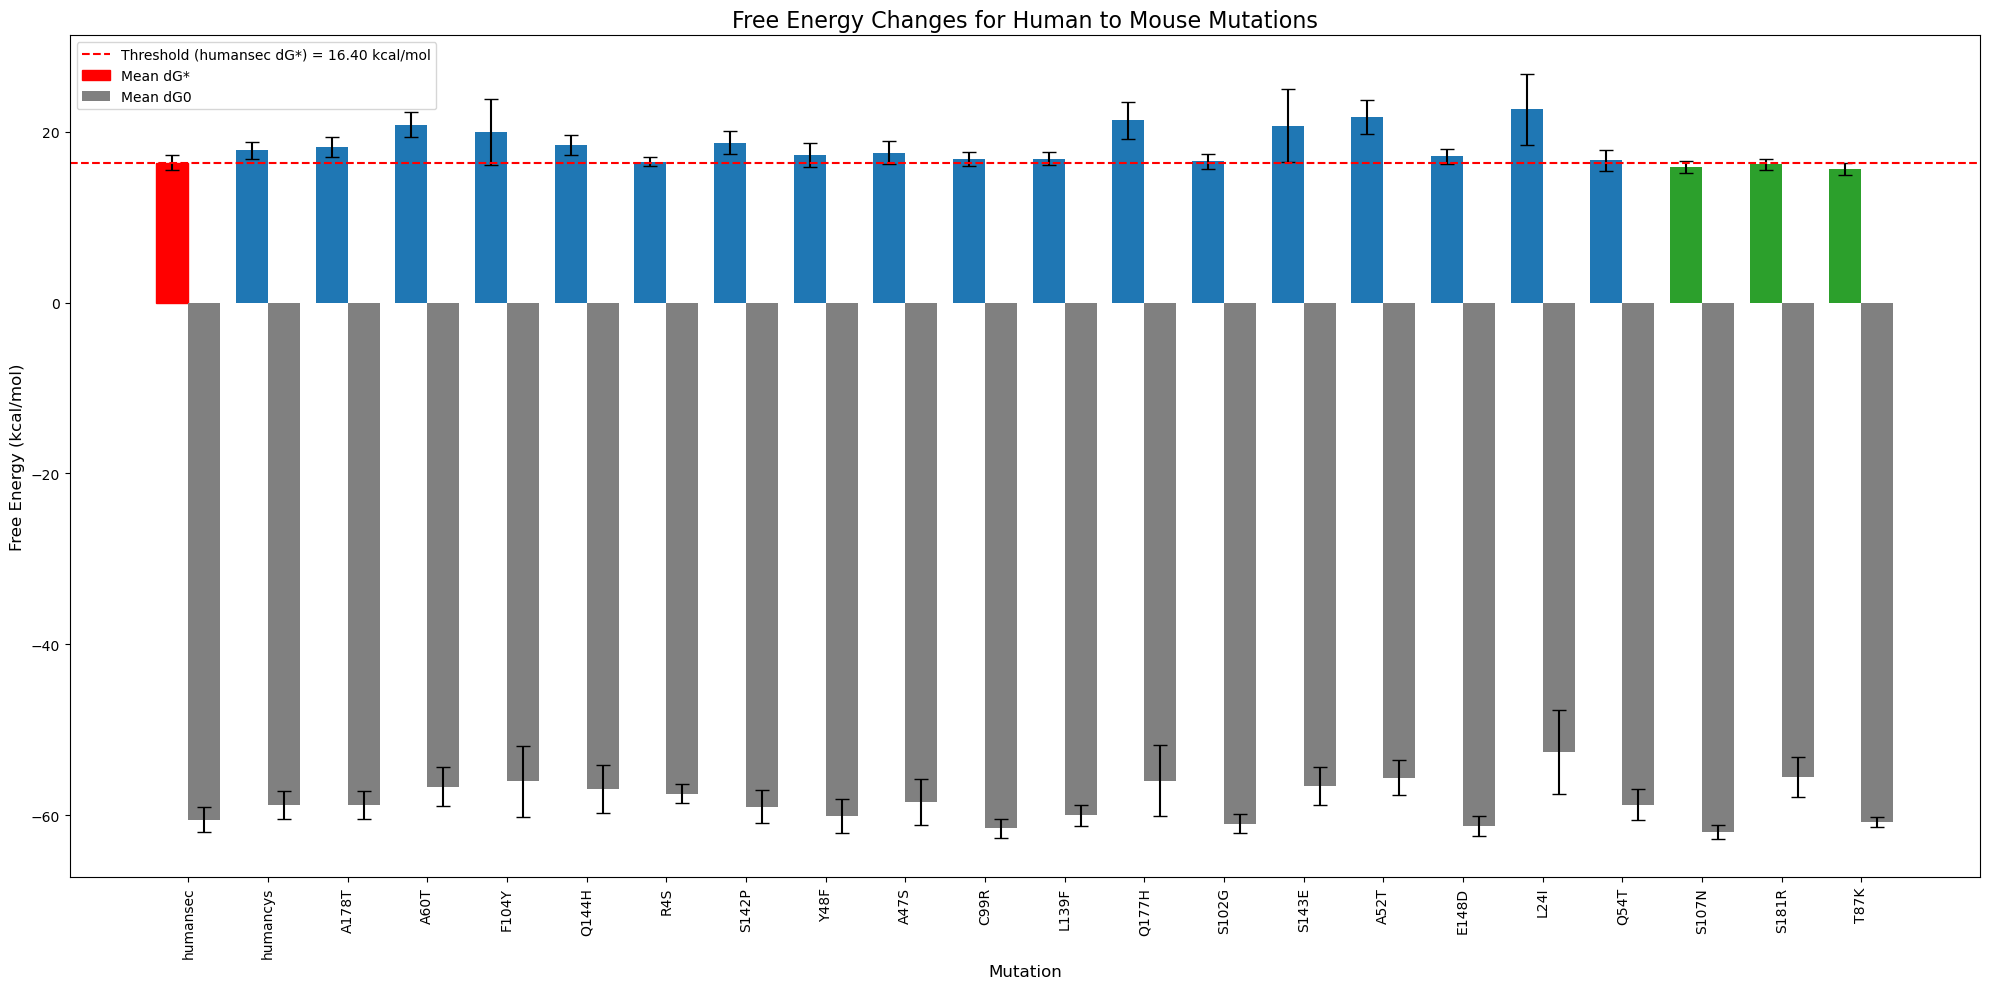

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt

# LaTeX table with free energy values
latex_table = r"""
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
Mutation & Mean dG* & Mean dG0 \\
\hline
humansec & 16.40 \pm 0.83 kcal/mol & -60.52 \pm 1.46 kcal/mol \\
\hline
humancys & 17.83 \pm 0.97 kcal/mol & -58.83 \pm 1.68 kcal/mol \\
\hline
A178T & 18.18 \pm 1.16 kcal/mol & -58.83 \pm 1.68 kcal/mol \\
\hline
A60T & 20.84 \pm 1.45 kcal/mol & -56.66 \pm 2.26 kcal/mol \\
\hline
F104Y & 19.94 \pm 3.88 kcal/mol & -56.06 \pm 4.18 kcal/mol \\
\hline
Q144H & 18.47 \pm 1.20 kcal/mol & -56.95 \pm 2.80 kcal/mol \\
\hline
R4S & 16.51 \pm 0.53 kcal/mol & -57.49 \pm 1.15 kcal/mol \\
\hline
S142P & 18.72 \pm 1.34 kcal/mol & -59.02 \pm 1.95 kcal/mol \\
\hline
Y48F & 17.25 \pm 1.38 kcal/mol & -60.09 \pm 2.00 kcal/mol \\
\hline
A47S & 17.55 \pm 1.37 kcal/mol & -58.48 \pm 2.71 kcal/mol \\
\hline
C99R & 16.80 \pm 0.78 kcal/mol & -61.57 \pm 1.12 kcal/mol \\
\hline
L139F & 16.86 \pm 0.75 kcal/mol & -60.03 \pm 1.26 kcal/mol \\
\hline
Q177H & 21.33 \pm 2.17 kcal/mol & -55.99 \pm 4.15 kcal/mol \\
\hline
S102G & 16.56 \pm 0.87 kcal/mol & -61.01 \pm 1.12 kcal/mol \\
\hline
S143E & 20.72 \pm 4.27 kcal/mol & -56.57 \pm 2.20 kcal/mol \\
\hline
A52T & 21.73 \pm 1.99 kcal/mol & -55.61 \pm 2.03 kcal/mol \\
\hline
E148D & 17.11 \pm 0.86 kcal/mol & -61.25 \pm 1.17 kcal/mol \\
\hline
L24I & 22.62 \pm 4.19 kcal/mol & -52.62 \pm 4.95 kcal/mol \\
\hline
Q54T & 16.64 \pm 1.28 kcal/mol & -58.79 \pm 1.84 kcal/mol \\
\hline
S107N & 15.85 \pm 0.71 kcal/mol & -61.97 \pm 0.81 kcal/mol \\
\hline
S181R & 16.19 \pm 0.63 kcal/mol & -55.53 \pm 2.34 kcal/mol \\
\hline
T87K & 15.61 \pm 0.69 kcal/mol & -60.85 \pm 0.58 kcal/mol \\
\hline
\end{tabular}
\caption{Combined Free Energy Changes}
\end{table}
"""

# Regex pattern to extract mutation data
pattern = re.compile(
    r"(?P<mutation>[A-Za-z0-9]+)\s*&\s*(?P<dg_star>[\d.]+|nan)\s*\\pm\s*(?P<dg_star_error>[\d.]+|nan)"
    r"\s*kcal/mol\s*&\s*(?P<dg0>[-\d.]+|nan)\s*\\pm\s*(?P<dg0_error>[\d.]+|nan)\s*kcal/mol"
)

# Extracting data
mutations = []
dg_star_values = []
dg_star_errors = []
dg0_values = []
dg0_errors = []

matches = pattern.findall(latex_table)
for match in matches:
    mutation, dg_star, dg_star_error, dg0, dg0_error = match

    mutations.append(mutation)
    dg_star_values.append(float(dg_star) if dg_star != "nan" else np.nan)
    dg_star_errors.append(float(dg_star_error) if dg_star_error != "nan" else np.nan)
    dg0_values.append(float(dg0) if dg0 != "nan" else np.nan)
    dg0_errors.append(float(dg0_error) if dg0_error != "nan" else np.nan)

# Determine the threshold dG* value using "humansec"
humansec_dg_star = None
for i, mut in enumerate(mutations):
    if mut == "humansec":
        humansec_dg_star = dg_star_values[i]
        break

# Ensure we have a threshold
if humansec_dg_star is None:
    humansec_dg_star = 16.40  # Default value

# Color mutations based on dG* threshold
colors = ['#2ca02c' if dg_star < humansec_dg_star else '#1f77b4' for dg_star in dg_star_values]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# X-axis positions
x = np.arange(len(mutations))

# Bar width
bar_width = 0.4

# Bar plot for dG*
bars1 = ax.bar(x - bar_width/2, dg_star_values, yerr=dg_star_errors, capsize=5, 
               label="Mean dG*", color=colors, width=bar_width, align='center')

# Bar plot for dG0 (with error bars)
bars2 = ax.bar(x + bar_width/2, dg0_values, yerr=dg0_errors, capsize=5,
               color='gray', width=bar_width, align='center', label="Mean dG0")

# Highlight humansec in red
humansec_index = mutations.index("humansec")
bars1[humansec_index].set_color('red')

# Annotate humansec threshold
ax.axhline(humansec_dg_star, color='red', linestyle='--', label=f'Threshold (humansec dG*) = {humansec_dg_star:.2f} kcal/mol')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(mutations, rotation=90, ha="center", fontsize=10)
ax.set_xlabel("Mutation", fontsize=12)
ax.set_ylabel("Free Energy (kcal/mol)", fontsize=12)
ax.set_title("Free Energy Changes for Human to Mouse Mutations", fontsize=16)
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Print confirmation of number of mutations
print(f"Plotting {len(mutations)} mutations")

# Adjust layout
plt.tight_layout()
plt.show()
